In [1]:
import utils
import torch
from importlib import import_module

In [2]:
model_path = "model/exp"
model_name = "best.pth"
data_dir = "../../input/data/"
batch_size = 32

In [3]:
    # -- dataset
test_dataset_module = getattr(import_module("dataset"), "BaseDataset")
test_dataset = test_dataset_module(
    data_dir = data_dir,
    ann_file = "test.json",
    train = False
)

# -- augmentation
transform_module = getattr(import_module("dataset"), "TestAugmentation")
transform = transform_module()
test_dataset.set_transform(transform)

# -- data loader
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size = batch_size,
    num_workers=4,
    collate_fn=utils.collate_fn,
)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


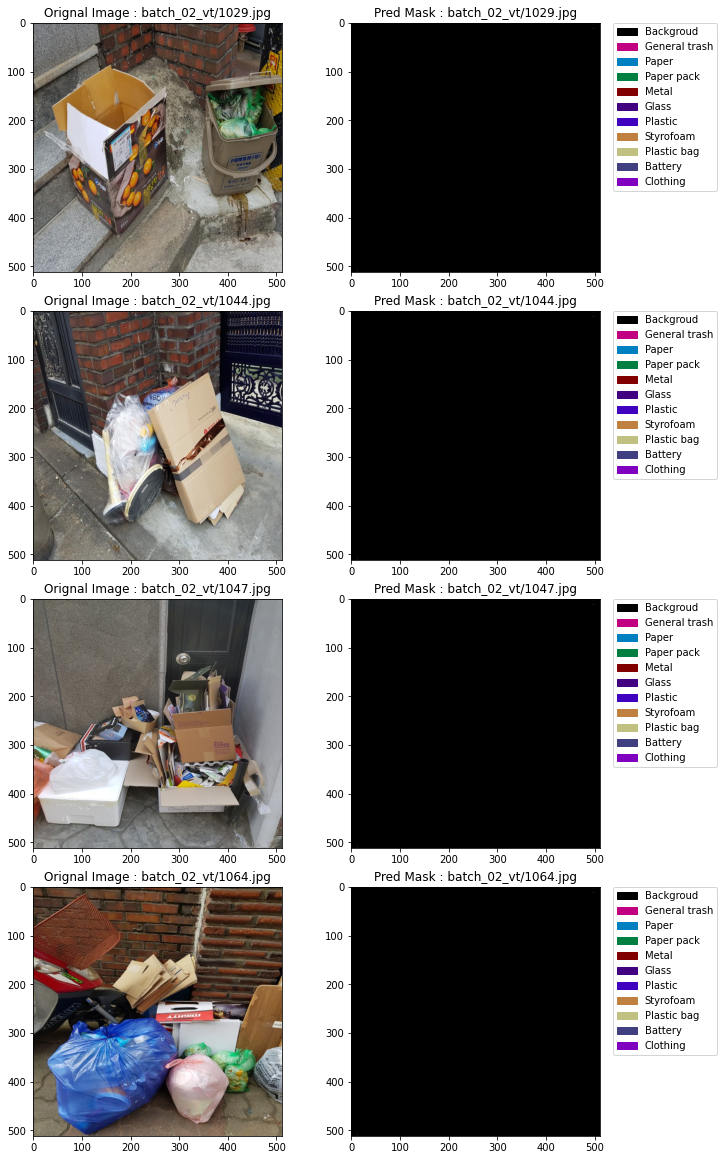

In [4]:
utils.plot_examples(model_path, model_name, "test", 7, 4, test_loader)